# Worksheet 15

Name:  Caroline Sullivan
UID: U61353624  

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

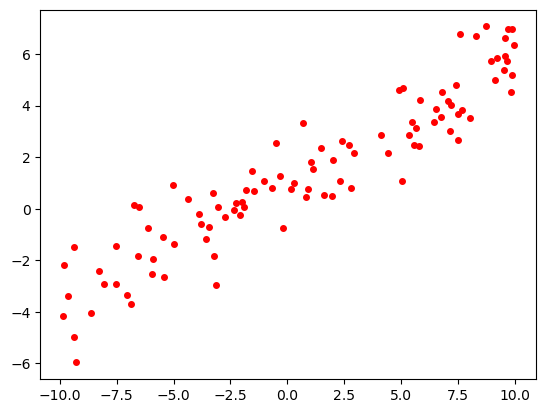

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , 0.5 ]) # beta is a vector with 2 values
xlin = -10.0 + 20.0 * np.random.random(100) # get random x's
ylin = beta[0]+(beta[1]*xlin)+np.random.randn(100) # set y values according to given eqn
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

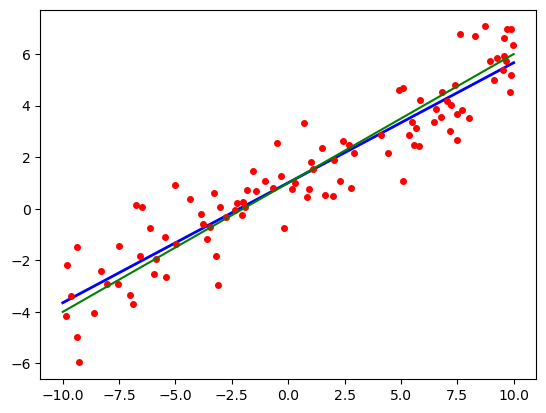

[1.  0.5]
[1.00897271 0.46554408]


In [5]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot
y_true = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.plot(xplot, y_true, 'g')
plt.show()

print(beta)
print(beta_est)

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate is pretty good!The intercept 1 is very close, the second slope element/X coefficient is a little off.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

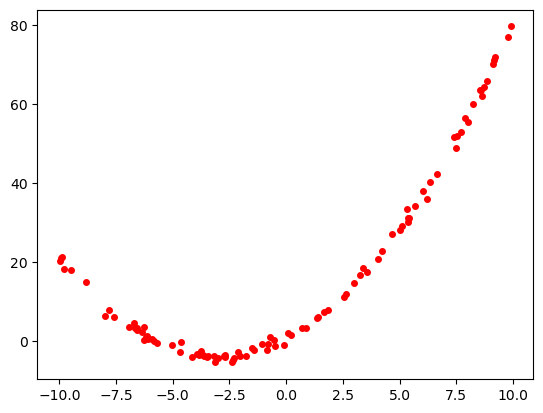

In [7]:
# NOTE: need 3 elements in beta now. One for intercept, one for X term, one for X^2 term
beta = np.array([ 1 , 3, 0.5 ]) # beta is a vector with 2 values
xlin = -10.0 + 20.0 * np.random.random(100) # get random x's
ylin = beta[0] + (beta[1]*xlin) + (beta[2]*xlin**2) + np.random.randn(100) # set y values according to given eqn
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

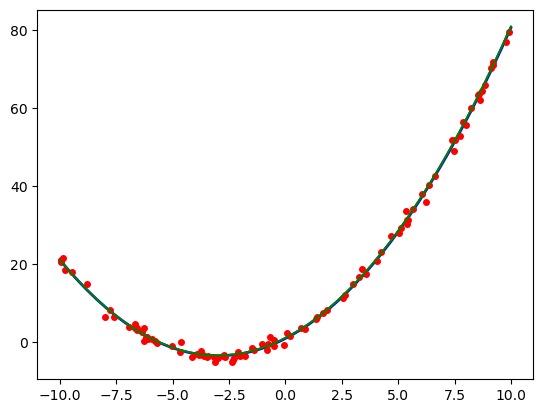

[1.  3.  0.5]
[0.8648006  2.98512982 0.49973738]


In [16]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin, xlin**2]).T # need to add feature x^2 to beta
beta_est = np.linalg.inv(X.T @ X) @ X.T @ ylin # NOTE: beta estimate is still the same here

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot + beta_est[2] * xplot**2
y_true = beta[0] + beta[1] * xplot + beta[2] * xplot**2
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.plot(xplot, y_true, 'g')
plt.show()

print(beta)
print(beta_est)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Once again, we got really close to the original estimate of beta!

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

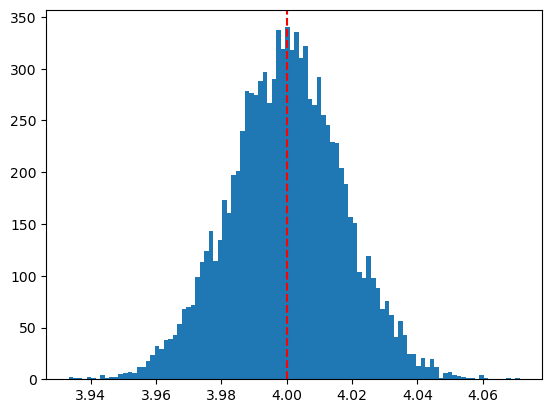

In [18]:
import numpy as np
import matplotlib.pyplot as plt

betas = [] # keep track of beta estimates
true_beta = np.array([3, 4]) # set our intercept
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1] * xlin + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ ylin)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()

Overall, we get pretty close - pretty spot on in our guesses. Some guesses are a little off, but overall we did a good job - created a normal-looking distribution